In [8]:
import os
import glob
import subprocess
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from photutils import CircularAperture
from photutils import aperture_photometry
from astropy.visualization import simple_norm
from photutils import CircularAperture
from photutils import CircularAnnulus

# from numpy import cov
# from scipy.stats import pearsonr

from scipy import optimize

# %matplotlib tk

In [9]:
files = glob.glob('data/*.fits')

In [10]:
columns = ['JD']
jd = []
for i in range(len(files)):
    jd.append(float(files[i][-11:-5])*24*3600 + float(files[i][10:17])*86400)
df = pd.DataFrame(columns=columns)
df['JD'] = jd

In [11]:
df

,JD
0,2.118434e+11
1,2.118435e+11
2,2.118434e+11
3,2.118434e+11
4,2.118437e+11
...,...
63,2.118435e+11
64,2.118435e+11
65,2.118436e+11
66,2.118435e+11


In [12]:
aperture_sum_list = []


for i in range(len(files)):
    nest_list = []
    hdu = fits.open(files[i])

    w = WCS(hdu[0].header)

#     positions = [(100., 100.),(41,115.5),(150,143)]
#     positions = [(101., 101.),(104,159),(103.5,172.5)]
#     positions = [(101., 101.),(70,99),(103.5,172.5)]
    positions = [(101., 101.),(73.2,118.2),(103,172.5)]
    

    aperture = CircularAperture(positions, r=6.)

    image = hdu[0].data

#     annulus_aperture = CircularAnnulus(positions, r_in=8., r_out=11.)
#     annulus_aperture = CircularAnnulus(positions, r_in=8., r_out=10.)
# better
#     annulus_aperture = CircularAnnulus(positions, r_in=11., r_out=13.)

#     if(i==0):
#         norm = simple_norm(image, 'sqrt', percent = 99)
#         plt.figure(figsize=(8,8)) #size
#         plt.style.use(astropy_mpl_style) #styling and gimmicks of astropy
#         plt.imshow(image,vmin=np.median(image)-1*np.std(image),
#                    vmax=np.median(image)+10*np.std(image),cmap='gray')
#         plt.colorbar() #a bar showing the scale of the image
#         aperture.plot(color='white',lw=2)
#         annulus_aperture.plot(color='red',lw=2)
#         annulus_masks = annulus_aperture.to_mask(method='center')
#         plt.imshow(annulus_masks[0], interpolation='nearest')
#         plt.colorbar()

    for j in range(7,12):
        for k in range(2,6):
#             nest_list = []
            annulus_aperture = CircularAnnulus(positions, r_in=j, r_out=j+k)
            apers = [aperture, annulus_aperture]
            phot_table = aperture_photometry(image, apers)
            for col in phot_table.colnames:
                phot_table[col].info.format = '%.8g'  # for consistent table output
            print(phot_table)


#             if(j==7 and k==2):
#                 norm = simple_norm(image, 'sqrt', percent = 99)
#                 plt.figure(figsize=(8,8)) #size
#                 plt.style.use(astropy_mpl_style) #styling and gimmicks of astropy
#                 plt.imshow(image,vmin=np.median(image)-1*np.std(image),
#                            vmax=np.median(image)+10*np.std(image),cmap='gray')
#                 plt.colorbar() #a bar showing the scale of the image
#                 aperture.plot(color='white',lw=2)
#                 annulus_aperture.plot(color='red',lw=2)
#                 annulus_masks = annulus_aperture.to_mask(method='center')
#                 plt.imshow(annulus_masks[0], interpolation='nearest')
#                 plt.colorbar()


            bkg_mean = phot_table['aperture_sum_1'] / annulus_aperture.area

            bkg_sum = bkg_mean * aperture.area
            final_sum = phot_table['aperture_sum_0'] - bkg_sum
            phot_table['residual_aperture_sum'] = final_sum
            phot_table['residual_aperture_sum'].info.format = '%.8g'  # for consistent table output
#             aperture_sum_list.append(nest_list)
#             print(phot_table)
#             print(len(nest_list))
    
            nest_list.append(phot_table['residual_aperture_sum'])
    aperture_sum_list.append(nest_list)
    
    
#             print(nest_list)
            
# print(aperture_sum_list)

 [astropy.io.fits.verify]
Changed DATE-OBS from '17/12/2000' to '2000-12-17''. [astropy.wcs.wcs]


 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      369594.79      316929.83
  2    73.2   118.2      466174.81      314299.52
  3     103   172.5      468460.86      300875.79
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      369594.79      510811.01
  2    73.2   118.2      466174.81      497246.83
  3     103   172.5      468460.86      479920.51
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      369594.79      724094.87
  2    73.2   118.2      466174.81      698684.69
  3     103   172.5      468460.86      680726.91
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                


Changed DATE-OBS from '28/12/2000' to '2000-12-28''. [astropy.wcs.wcs]
Changed DATE-OBS from '28/01/2001' to '2001-01-28''. [astropy.wcs.wcs]
Changed DATE-OBS from '15/12/2000' to '2000-12-15''. [astropy.wcs.wcs]


 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      227717.56       489323.6
  2    73.2   118.2      320876.54      453282.99
  3     103   172.5      328249.44      445039.93
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      227717.56      629848.86
  2    73.2   118.2      320876.54         592110
  3     103   172.5      328249.44      592484.14
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      227717.56      249360.55
  2    73.2   118.2      320876.54      225856.38
  3     103   172.5      328249.44      221378.69
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                


Changed DATE-OBS from '02/01/2001' to '2001-01-02''. [astropy.wcs.wcs]
Changed DATE-OBS from '17/01/2001' to '2001-01-17''. [astropy.wcs.wcs]
Changed DATE-OBS from '05/02/2001' to '2001-02-05''. [astropy.wcs.wcs]


 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      865551.74      2941837.8
  2    73.2   118.2      939598.56      2930592.2
  3     103   172.5      951565.06      2976529.2
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      865551.74      1133146.5
  2    73.2   118.2      939598.56      1126141.1
  3     103   172.5      951565.06      1137124.1
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      865551.74      1763223.7
  2    73.2   118.2      939598.56      1758489.7
  3     103   172.5      951565.06      1785960.4
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                


Changed DATE-OBS from '24/01/2001' to '2001-01-24''. [astropy.wcs.wcs]
Changed DATE-OBS from '21/12/2000' to '2000-12-21''. [astropy.wcs.wcs]
Changed DATE-OBS from '01/02/2001' to '2001-02-01''. [astropy.wcs.wcs]
Changed DATE-OBS from '01/01/2001' to '2001-01-01''. [astropy.wcs.wcs]


 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      355470.45      300920.32
  2    73.2   118.2      448291.82      297623.15
  3     103   172.5      457930.49      286006.92
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      355470.45      483888.23
  2    73.2   118.2      448291.82      471599.16
  3     103   172.5      457930.49      456983.68
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      355470.45      685508.68
  2    73.2   118.2      448291.82       662313.4
  3     103   172.5      457930.49      648219.76
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                


Changed DATE-OBS from '30/01/2001' to '2001-01-30''. [astropy.wcs.wcs]
Changed DATE-OBS from '04/02/2001' to '2001-02-04''. [astropy.wcs.wcs]
Changed DATE-OBS from '22/01/2001' to '2001-01-22''. [astropy.wcs.wcs]
Changed DATE-OBS from '14/01/2001' to '2001-01-14''. [astropy.wcs.wcs]


 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      255261.58      757967.38
  2    73.2   118.2      345127.35      729047.45
  3     103   172.5      355000.68      768001.53
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      255261.58      297175.12
  2    73.2   118.2      345127.35      279096.79
  3     103   172.5      355000.68         282231
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      255261.58       455961.8
  2    73.2   118.2      345127.35      437496.04
  3     103   172.5      355000.68      453669.57
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                


Changed DATE-OBS from '04/01/2001' to '2001-01-04''. [astropy.wcs.wcs]
Changed DATE-OBS from '29/12/2000' to '2000-12-29''. [astropy.wcs.wcs]


 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      401273.62      342008.86
  2    73.2   118.2      492464.97       340747.3
  3     103   172.5      502125.32      328332.84
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      401273.62      551643.53
  2    73.2   118.2      492464.97      539792.93
  3     103   172.5      502125.32      524474.32
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      401273.62      782781.61
  2    73.2   118.2      492464.97       758664.4
  3     103   172.5      502125.32      744494.72
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                


Changed DATE-OBS from '07/02/2001' to '2001-02-07''. [astropy.wcs.wcs]
Changed DATE-OBS from '06/01/2001' to '2001-01-06''. [astropy.wcs.wcs]
Changed DATE-OBS from '16/12/2000' to '2000-12-16''. [astropy.wcs.wcs]


 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      751345.24      662982.84
  2    73.2   118.2      836584.81       655326.3
  3     103   172.5      845616.55      645587.96
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      751345.24      1059625.8
  2    73.2   118.2      836584.81      1040607.8
  3     103   172.5      845616.55        1029221
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      751345.24      1494105.1
  2    73.2   118.2      836584.81        1466066
  3     103   172.5      845616.55      1454363.4
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                


Changed DATE-OBS from '18/12/2000' to '2000-12-18''. [astropy.wcs.wcs]
Changed DATE-OBS from '19/12/2000' to '2000-12-19''. [astropy.wcs.wcs]


 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      269212.36      492872.67
  2    73.2   118.2      336449.77      477078.62
  3     103   172.5      339770.05      490531.42
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      269212.36      677251.95
  2    73.2   118.2      336449.77      663696.03
  3     103   172.5      339770.05      697198.56
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      269212.36       873895.3
  2    73.2   118.2      336449.77      863887.77
  3     103   172.5      339770.05      916696.63
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                


Changed DATE-OBS from '09/01/2001' to '2001-01-09''. [astropy.wcs.wcs]
Changed DATE-OBS from '31/01/2001' to '2001-01-31''. [astropy.wcs.wcs]
Changed DATE-OBS from '13/12/2000' to '2000-12-13''. [astropy.wcs.wcs]


 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      466251.46      595064.29
  2    73.2   118.2      559335.76      587486.67
  3     103   172.5      569436.92      598470.62
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      466251.46      923142.21
  2    73.2   118.2      559335.76      917794.82
  3     103   172.5      569436.92      950143.06
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      466251.46      1274451.8
  2    73.2   118.2      559335.76      1274251.1
  3     103   172.5      569436.92      1332424.2
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                


Changed DATE-OBS from '13/01/2001' to '2001-01-13''. [astropy.wcs.wcs]
Changed DATE-OBS from '26/12/2000' to '2000-12-26''. [astropy.wcs.wcs]
Changed DATE-OBS from '25/12/2000' to '2000-12-25''. [astropy.wcs.wcs]


 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      203709.94      168124.32
  2    73.2   118.2      304464.99      167802.82
  3     103   172.5      311876.02      153135.97
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      203709.94       274634.5
  2    73.2   118.2      304464.99      263364.72
  3     103   172.5      311876.02      244988.37
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      203709.94      393583.03
  2    73.2   118.2      304464.99      367886.56
  3     103   172.5      311876.02      349058.09
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                


Changed DATE-OBS from '08/02/2001' to '2001-02-08''. [astropy.wcs.wcs]
Changed DATE-OBS from '16/01/2001' to '2001-01-16''. [astropy.wcs.wcs]
Changed DATE-OBS from '27/01/2001' to '2001-01-27''. [astropy.wcs.wcs]


 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      263004.47      745364.41
  2    73.2   118.2      315102.61      726417.79
  3     103   172.5      323192.41      732310.07
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      263004.47      288326.01
  2    73.2   118.2      315102.61       276761.1
  3     103   172.5      323192.41      274775.67
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      263004.47      451744.49
  2    73.2   118.2      315102.61      435702.37
  3     103   172.5      323192.41      436613.13
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                


Changed DATE-OBS from '31/12/2000' to '2000-12-31''. [astropy.wcs.wcs]


 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      621389.85      544219.28
  2    73.2   118.2      711660.98      539445.37
  3     103   172.5      723265.09      528679.66
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      621389.85      872283.25
  2    73.2   118.2      711660.98      855958.94
  3     103   172.5      723265.09      843105.26
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      621389.85      1231042.1
  2    73.2   118.2      711660.98      1204980.9
  3     103   172.5      723265.09      1193149.4
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                


Changed DATE-OBS from '25/01/2001' to '2001-01-25''. [astropy.wcs.wcs]


 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      317399.51      271736.53
  2    73.2   118.2      403997.36      264950.97
  3     103   172.5      415004.14      251816.28
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      317399.51      439234.42
  2    73.2   118.2      403997.36      418611.56
  3     103   172.5      415004.14      402221.61
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      317399.51      620293.79
  2    73.2   118.2      403997.36      587408.05
  3     103   172.5      415004.14      569511.89
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                


Changed DATE-OBS from '23/12/2000' to '2000-12-23''. [astropy.wcs.wcs]
Changed DATE-OBS from '26/01/2001' to '2001-01-26''. [astropy.wcs.wcs]
Changed DATE-OBS from '20/12/2000' to '2000-12-20''. [astropy.wcs.wcs]
Changed DATE-OBS from '10/01/2001' to '2001-01-10''. [astropy.wcs.wcs]



 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      327501.21      507722.98
  2    73.2   118.2      418624.92      478976.46
  3     103   172.5      424429.54      469963.95
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      327501.21      704116.79
  2    73.2   118.2      418624.92      670550.99
  3     103   172.5      424429.54      663841.78
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      327501.21         912234
  2    73.2   118.2      418624.92      878492.12
  3     103   172.5      424429.54      879387.15
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                

Changed DATE-OBS from '24/12/2000' to '2000-12-24''. [astropy.wcs.wcs]
Changed DATE-OBS from '05/01/2001' to '2001-01-05''. [astropy.wcs.wcs]


 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      425115.87      466826.11
  2    73.2   118.2       519625.8       444908.1
  3     103   172.5      526886.17       441435.6
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      425115.87      729523.47
  2    73.2   118.2       519625.8      699370.42
  3     103   172.5      526886.17      701727.98
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      425115.87      1007955.8
  2    73.2   118.2       519625.8      975924.53
  3     103   172.5      526886.17      993019.28
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                


Changed DATE-OBS from '29/01/2001' to '2001-01-29''. [astropy.wcs.wcs]
Changed DATE-OBS from '11/01/2001' to '2001-01-11''. [astropy.wcs.wcs]
Changed DATE-OBS from '22/12/2000' to '2000-12-22''. [astropy.wcs.wcs]


 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      435153.93      373592.08
  2    73.2   118.2      532247.89      369192.07
  3     103   172.5      539127.77      355599.44
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      435153.93      602610.94
  2    73.2   118.2      532247.89      584773.05
  3     103   172.5      539127.77      567797.48
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      435153.93      853437.53
  2    73.2   118.2      532247.89       822951.1
  3     103   172.5      539127.77       804692.7
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                


Changed DATE-OBS from '03/01/2001' to '2001-01-03''. [astropy.wcs.wcs]


 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      383866.48      1182720.8
  2    73.2   118.2       471585.4      1159463.6
  3     103   172.5      482182.73      1183954.3
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      383866.48      458861.67
  2    73.2   118.2       471585.4      444124.46
  3     103   172.5      482182.73      444967.29
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      383866.48       710539.9
  2    73.2   118.2       471585.4      695728.29
  3     103   172.5      482182.73      704481.43
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                


Changed DATE-OBS from '15/01/2001' to '2001-01-15''. [astropy.wcs.wcs]
Changed DATE-OBS from '06/02/2001' to '2001-02-06''. [astropy.wcs.wcs]
Changed DATE-OBS from '11/12/2000' to '2000-12-11''. [astropy.wcs.wcs]



 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      251989.98      484684.46
  2    73.2   118.2      326232.47      467177.95
  3     103   172.5         336730      455057.98
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      251989.98      635735.08
  2    73.2   118.2      326232.47      613570.39
  3     103   172.5         336730      605761.61
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                
--- ------- ------- -------------- --------------
  1     101     101      251989.98      243863.12
  2    73.2   118.2      326232.47      233369.93
  3     103   172.5         336730      226226.85
 id xcenter ycenter aperture_sum_0 aperture_sum_1
      pix     pix                                

Changed DATE-OBS from '07/01/2001' to '2001-01-07''. [astropy.wcs.wcs]


In [13]:
len(nest_list)

20

In [14]:
len(aperture_sum_list[0])
# globals()["var_"+str(n)]

20

In [15]:
dictionar0 = {}
dictionar1 = {}
dictionar2 = {}

for j in range(7,12):
    for k in range(2,6):
#         vars()["ins_mag_0_"+str(j)+"_"+str(k)] = []
#         vars()["ins_mag_1_"+str(j)+"_"+str(k)] = []
#         vars()["ins_mag_2_"+str(j)+"_"+str(k)] = []
        dictionar0["ins_mag_0_%s-%s" %(j,j+k)] = []
        dictionar1["ins_mag_1_%s-%s" %(j,j+k)] = []
        dictionar2["ins_mag_2_%s-%s" %(j,j+k)] = []
    

        for i in range(len(aperture_sum_list)): 
#             vars()["ins_mag_0_"+str(j)+"_"+str(k)].append(aperture_sum_list[i][0][0])
#             vars()["ins_mag_1_"+str(j)+"_"+str(k)].append(aperture_sum_list[i][0][1])         
#             vars()["ins_mag_2_"+str(j)+"_"+str(k)].append(aperture_sum_list[i][0][2]) 
            dictionar0["ins_mag_0_%s-%s" %(j,j+k)].append(-2.5*np.log(aperture_sum_list[i][0][0]))
            dictionar1["ins_mag_1_%s-%s" %(j,j+k)].append(-2.5*np.log(aperture_sum_list[i][0][1]))        
            dictionar2["ins_mag_2_%s-%s" %(j,j+k)].append(-2.5*np.log(aperture_sum_list[i][0][2]))
#             print(vars()["ins_mag_0_"+str(j)+"_"+str(k)])
            


In [16]:
len(dictionar0.keys())

20

In [17]:
print(dictionar0.keys(), dictionar1.keys(),dictionar2.keys())

dict_keys(['ins_mag_0_7-9', 'ins_mag_0_7-10', 'ins_mag_0_7-11', 'ins_mag_0_7-12', 'ins_mag_0_8-10', 'ins_mag_0_8-11', 'ins_mag_0_8-12', 'ins_mag_0_8-13', 'ins_mag_0_9-11', 'ins_mag_0_9-12', 'ins_mag_0_9-13', 'ins_mag_0_9-14', 'ins_mag_0_10-12', 'ins_mag_0_10-13', 'ins_mag_0_10-14', 'ins_mag_0_10-15', 'ins_mag_0_11-13', 'ins_mag_0_11-14', 'ins_mag_0_11-15', 'ins_mag_0_11-16']) dict_keys(['ins_mag_1_7-9', 'ins_mag_1_7-10', 'ins_mag_1_7-11', 'ins_mag_1_7-12', 'ins_mag_1_8-10', 'ins_mag_1_8-11', 'ins_mag_1_8-12', 'ins_mag_1_8-13', 'ins_mag_1_9-11', 'ins_mag_1_9-12', 'ins_mag_1_9-13', 'ins_mag_1_9-14', 'ins_mag_1_10-12', 'ins_mag_1_10-13', 'ins_mag_1_10-14', 'ins_mag_1_10-15', 'ins_mag_1_11-13', 'ins_mag_1_11-14', 'ins_mag_1_11-15', 'ins_mag_1_11-16']) dict_keys(['ins_mag_2_7-9', 'ins_mag_2_7-10', 'ins_mag_2_7-11', 'ins_mag_2_7-12', 'ins_mag_2_8-10', 'ins_mag_2_8-11', 'ins_mag_2_8-12', 'ins_mag_2_8-13', 'ins_mag_2_9-11', 'ins_mag_2_9-12', 'ins_mag_2_9-13', 'ins_mag_2_9-14', 'ins_mag_2_10-12

In [18]:
df_dict = {}
for key in dictionar0:
#     print(key[10:])
    df_dict['df-'+key[10:]] = pd.DataFrame()
print(df_dict)

{'df-7-9': Empty DataFrame
Columns: []
Index: [], 'df-7-10': Empty DataFrame
Columns: []
Index: [], 'df-7-11': Empty DataFrame
Columns: []
Index: [], 'df-7-12': Empty DataFrame
Columns: []
Index: [], 'df-8-10': Empty DataFrame
Columns: []
Index: [], 'df-8-11': Empty DataFrame
Columns: []
Index: [], 'df-8-12': Empty DataFrame
Columns: []
Index: [], 'df-8-13': Empty DataFrame
Columns: []
Index: [], 'df-9-11': Empty DataFrame
Columns: []
Index: [], 'df-9-12': Empty DataFrame
Columns: []
Index: [], 'df-9-13': Empty DataFrame
Columns: []
Index: [], 'df-9-14': Empty DataFrame
Columns: []
Index: [], 'df-10-12': Empty DataFrame
Columns: []
Index: [], 'df-10-13': Empty DataFrame
Columns: []
Index: [], 'df-10-14': Empty DataFrame
Columns: []
Index: [], 'df-10-15': Empty DataFrame
Columns: []
Index: [], 'df-11-13': Empty DataFrame
Columns: []
Index: [], 'df-11-14': Empty DataFrame
Columns: []
Index: [], 'df-11-15': Empty DataFrame
Columns: []
Index: [], 'df-11-16': Empty DataFrame
Columns: []
Ind

In [19]:
for j in range(7,12):
    for k in range(2,6):
        df_dict['df-'+str(j)+'-'+str(j+k)]['JD'] = df['JD']
        df_dict['df-'+str(j)+'-'+str(j+k)]['ins_mag_0'] = dictionar0["ins_mag_0_%s-%s" %(j,j+k)]
        df_dict['df-'+str(j)+'-'+str(j+k)]['ins_mag_1'] = dictionar1["ins_mag_1_%s-%s" %(j,j+k)]
        df_dict['df-'+str(j)+'-'+str(j+k)]['ins_mag_2'] = dictionar2["ins_mag_2_%s-%s" %(j,j+k)]
        df_dict['df-'+str(j)+'-'+str(j+k)]['dm_0'] = df_dict['df-'+str(j)+'-'+str(j+k)]['ins_mag_0'] - df_dict['df-'+str(j)+'-'+str(j+k)]['ins_mag_2']
        df_dict['df-'+str(j)+'-'+str(j+k)]['dm_1'] = df_dict['df-'+str(j)+'-'+str(j+k)]['ins_mag_1'] - df_dict['df-'+str(j)+'-'+str(j+k)]['ins_mag_2']
        df_dict['df-'+str(j)+'-'+str(j+k)]['dm_2'] = df_dict['df-'+str(j)+'-'+str(j+k)]['ins_mag_2'] - df_dict['df-'+str(j)+'-'+str(j+k)]['ins_mag_2']

In [14]:
# aperture_sum_list_0=[]
# aperture_sum_list_1=[]
# aperture_sum_list_2=[]
# for i in range(len(aperture_sum_list)):
#     aperture_sum_list_0.append(-2.5*np.log(aperture_sum_list[i][0]))
#     aperture_sum_list_1.append(-2.5*np.log(aperture_sum_list[i][1]))
#     aperture_sum_list_2.append(-2.5*np.log(aperture_sum_list[i][2]))


In [15]:
# df_dict

In [16]:
# fig, ax = plt.subplots(1,1, figsize=(14,8*16))

# y0 = df["ins_mag_0"]
# y1 = df["ins_mag_1"]
# y2 = df["ins_mag_2"]
# x = df["JD"]
# ax.set_xlabel('JD', fontsize=20)
# ax.set_ylabel('instrumental magnitude',fontsize=20)

# ax.scatter(x,y0,s=20,marker='+')
# # ax.scatter(x,y1,s=20,marker='o')
# # ax.scatter(x,y2,s=20,marker='x')

# # def objective(x, a, b, c):
# #     return a * np.sin(b*x) + c

# # popt, _ = optimize.curve_fit(objective, x1, y1)

# # a, b, c = popt

# # x_new = np.arange(df['JD'].min(),df['JD'].max(), 10000)
# # y_new = objective(x_new, a, b, c)

# # ax.scatter(x_new,y_new)



<ipython-input-17-0c27255c2743>:37: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.setp(ax[i].get_xticklabels(), Fontsize=16)
<ipython-input-17-0c27255c2743>:38: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.setp(ax[i].get_yticklabels(), Fontsize=16)


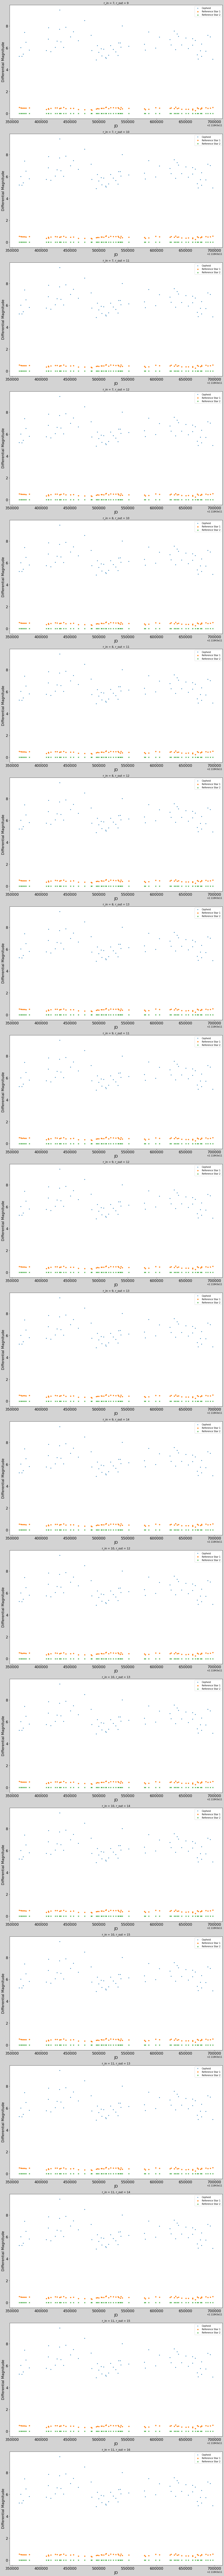

In [17]:
# fig, ax = plt.subplots(1,1, figsize=(14,8))

# y0 = df["da_0"]
# y1 = df["da_1"]
# y2 = df["da_2"]
# x = df["JD"]
# ax.set_xlabel('JD', fontsize=20)
# ax.set_ylabel('differential magnitude',fontsize=20)

# ax.scatter(x,y0,s=20,marker='+')
# ax.scatter(x,y1,s=20,marker='o')
# ax.scatter(x,y2,s=20,marker='x')

# def objective(x, a, b, c):
#     return a * np.sin(b*x) + c

# popt, _ = optimize.curve_fit(objective, x1, y1)

# a, b, c = popt

# x_new = np.arange(df['JD'].min(),df['JD'].max(), 10000)
# y_new = objective(x_new, a, b, c)

# ax.scatter(x_new,y_new)

fig, ax = plt.subplots(20,1, figsize=(14,8*20))
# fig, ax = plt.subplots(2,1, figsize=(5,5))

fig.patch.set_facecolor('lightgrey')
i = 0
# for i in range(1):
for j in range(7,12):
    for k in range(2,6):
        
        ax[i].set_xlabel('JD', fontsize=16)
        ax[i].set_ylabel('Differential Magnitude',fontsize=16)
        plt.setp(ax[i].get_xticklabels(), Fontsize=16)
        plt.setp(ax[i].get_yticklabels(), Fontsize=16)
        ax[i].scatter(df_dict['df-'+str(j)+'-'+str(j+k)]['JD'], df_dict['df-'+str(j)+'-'+str(j+k)]['dm_0'],s=20,marker='+', label='Cepheid')
        ax[i].scatter(df_dict['df-'+str(j)+'-'+str(j+k)]['JD'], df_dict['df-'+str(j)+'-'+str(j+k)]['dm_1'],s=20,marker='o', label='Reference Star 1')
        ax[i].scatter(df_dict['df-'+str(j)+'-'+str(j+k)]['JD'], df_dict['df-'+str(j)+'-'+str(j+k)]['dm_2'],s=20,marker='x', label='Reference Star 2')
        ax[i].title.set_text('r_in = '+str(j)+', r_out = '+ str(j+k))
        ax[i].legend(loc="upper right")

        i = i+1


#     plt.phase_spectrum(data2['LC_INIT'][2:], color ='green') 

fig.tight_layout()
plt.show()
# plt.savefig('uma-plot.png')



In [7]:
df

,JD
0,2.118434e+11
1,2.118435e+11
2,2.118434e+11
3,2.118434e+11
4,2.118437e+11
...,...
63,2.118435e+11
64,2.118435e+11
65,2.118436e+11
66,2.118435e+11
